In [ ]:
# This code does hierarchical clustering of the subjects from Chowell_2018 (restricted to the subjects
# with HLA alleles all can be matched to some among those we know the pseudo sequences for)
# by their distance matrices computed based on 
# depth set


In [1]:
import os
import sys
import re
import pickle
import numpy as np
import pandas as pd

from collections import defaultdict
from collections import Counter

In [2]:
import random
import math

In [3]:
import scipy.spatial.distance as ssd

from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list, cut_tree, set_link_color_palette
from matplotlib import pyplot as plt

In [4]:
df_depth_set = pd.read_csv("../results/st12_chowell_2018_kept_depth_set_mat.csv", header = 0)
df_depth_set.shape

(1443, 1443)

In [5]:
np_depth_set = df_depth_set.to_numpy()
np_depth_set.shape

(1443, 1443)

In [6]:
depth_set_distArray = ssd.squareform(np_depth_set)
depth_set_distArray.shape

(1040403,)

In [7]:
depth_set_linked = linkage(depth_set_distArray, 'ward')

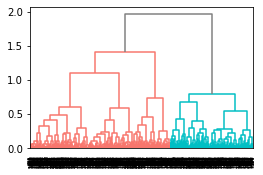

In [8]:
plt.figure(figsize=(4, 2.6))

set_link_color_palette(["#F8766D", "#00BFC4"])
dendrogram(depth_set_linked,
           orientation='top',
           color_threshold = 1.6,
           distance_sort='descending',
           above_threshold_color='grey',
           show_leaf_counts=False)

plt.savefig("../figures/depth_draft/step8_chowell2018_depth_set_hc_cut1pt6_dendrogram_4_2.6.png", 
            dpi = 200, facecolor="w")

In [9]:
depth_set_cutree_1pt6 = cut_tree(depth_set_linked, height = 1.6)
depth_set_cluster_label_list_1pt6 = [x[0] for x in depth_set_cutree_1pt6.tolist()]

Counter(depth_set_cluster_label_list_1pt6)

Counter({0: 909, 1: 534})

In [10]:
df_info = pd.read_csv("../results/st12_chowell_2018_depth_glazer_aa_set_breadth.csv", header = 0)
df_info.shape

(1443, 23)

In [11]:
df_info['cluster_cut1pt6'] = depth_set_cluster_label_list_1pt6

In [19]:
df_info.to_csv("../results/depth_draft/step8_chowell_2018_depth_glazer_aa_set_breadth_replace_depth_set_dist_hc_wald_1_1pt6.csv", 
              index = False)